In [1]:
from modules.input_gen import generate_prompt, generate_wifi_qr_string

prompt, filename = generate_prompt()
print(prompt)
print(filename)

A QR code, cleverly designed into a minimalist medieval village, noir theme, graffiti style, 3D rendered
minimalist_medieval_village_graffiti_style_noir


In [2]:
message = 'https://www.linkedin.com/in/till-zacher/'
message = generate_wifi_qr_string('Zacher', 'warwisch2')
print(message)

WIFI:S:Zacher;T:WPA;P:warwisch2;;


In [3]:
from modules.qr_code_gen import generate_qr_code, add_noise_to_qr_code

border = 10
mask_logo = 10
clean_qr = generate_qr_code(message, border=border, mask_logo=mask_logo)

center_noise_level = 1
noise_level = 0.5
border_noise_level = 1
noisy_qr = add_noise_to_qr_code(clean_qr, noise_level=noise_level, border_noise_level=border_noise_level, center_noise_level=center_noise_level, mask_logo=mask_logo)

/opt/homebrew/Caskroom/miniconda/base/envs/torch_mps_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


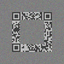

In [4]:
from modules.diffuser import resize_for_condition_image

resize_for_condition_image(noisy_qr, resolution=64)

In [5]:
from modules.diffuser import run_diffusion_on_qr_code

message = 'https://www.linkedin.com/in/till-zacher/'
prompt, filename = generate_prompt()
print(f'Prompt: {prompt}')
print(f'Filename: {filename}')
border = 10
mask_logo = 10

center_noise_level = 1
noise_level = 0.5
border_noise_level = 1

model_id = 'models/animerge_v23'
resolution = 512
num_inference_steps = 20
seed = 11111

invert_colors = False
guidance_scale = 20
controlnet_conditioning_scale=1.5
strength=0.9
num_inference_steps=150
verbose=False

run_diffusion_on_qr_code(
    message,
    prompt,
    filename,
    border=border,
    mask_logo=mask_logo,
    center_noise_level=center_noise_level,
    noise_level=noise_level,
    border_noise_level=border_noise_level,
    model_id=model_id,
    resolution=resolution,
    num_inference_steps=num_inference_steps,
    seed=seed,
    invert_colors=invert_colors,
    guidance_scale=guidance_scale,
    controlnet_conditioning_scale=controlnet_conditioning_scale,
    strength=strength,
    verbose=verbose
)

Prompt: A QR code, cleverly infused into a surreal skyline, transparent theme, line art, 3D rendered
Filename: surreal_skyline_line_art_transparent


Loading pipeline components...:  17%|█▋        | 1/6 [00:00<00:01,  4.34it/s]An error occurred while trying to fetch models/animerge_v23/vae: Error no file named diffusion_pytorch_model.safetensors found in directory models/animerge_v23/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/opt/homebrew/Caskroom/miniconda/base/envs/torch_mps_env/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch models/animerge_v23/unet: Error no file named diffusion_pytorch_model.safetensors found in directory models/animerge_v23/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00, 12.56it/s]
You have disabled the safet

AssertionError: Torch not compiled with CUDA enabled